<a href="https://colab.research.google.com/github/djdunc/casa0018/blob/main/Week1/CASA0018_1_2_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Which Image
This example is based on the [TensorFlow tutorial in this video](https://youtu.be/j-35y1M9rRU?t=191) (note: start at 3min 11sec) to train a neural network to recognize items of clothing from a common dataset called Fashion MNIST. 

You can learn more about the Fashion NMIST dataset [here](https://github.com/zalandoresearch/fashion-mnist). It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale image. The NMIST character dataset which inspired this one can be found [here](http://yann.lecun.com/exdb/mnist/).

# Importing dependencies
Let's start by importing TensorFlow, printing out the version number and create an object that points to the Fashion MNIST data via the tf.keras datasets API. How did we know where the dataset was? TensorFlow Datasets provide a list of resources that are easily accessible in the Colabs - a catalogue of what is availabe is at: https://www.tensorflow.org/datasets/catalog/overview)


In [1]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist

2.3.0



# Loading the image data
Calling **load_data** on the **mnist** object will give you two sets of lists, these will be the training and testing values for the graphics that contain the clothing items and their labels. They are 60000 and 10000 images in size by default. 

Note: that is 85% and 15% split. And why no validation data? What happened to the 60-20-20 split we heard earlier? How does the function know which is training and which is test? [70-15-15 | pre-sorted]


In [2]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Exploring the data and preparing it for use
What does these values look like? We are going to import a library that helps us display an image and point it to a training image, and a training label to see. Experiment with different indices in the array.


shape: (28, 28)
Label: 9


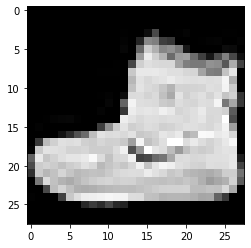

In [3]:
sample = 0;
print("shape:", training_images[sample].shape)

import matplotlib.pyplot as plt
plt.imshow(training_images[sample], cmap='gray')
print("Label:", training_labels[sample])


Each of the 'pixel' values above are between 0 (black) and 255 (white). 

To '**normalize**' the data between 0 and 1, in Python we just need to divide all values by 255.0:

In [4]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

# Building the model
To create the sequence of layers in a model we use  '**Sequential**'. The model has 3 layers. First layer is called '**Flatten**' which takes the square image (28x28 pixels) and turns it into a 1 dimensional set. The second layer '**Dense**' has 128 neurons and the 3rd layer '**Dense**' has 10 neurons. Note the input to the model is a 28x28 image and the output is one of 10 neurons which relates to the 10 fashion categories. 

The activition functions are code that runs when the model is training - '**relu**' (Rectified Linear Unit - ReLU) converts any negative value to zero (to keep us between 0 and 1), '**softmax**' looks at all the probabilities in that layer of neurons and sets the highest value to 1 and all the others to 0 - this makes it programatically easier to find the most likely solution.  

In [5]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

After defining the model we build it by compiling with an optimizer and loss function (we will cover these more in a later lecture) and then you train it by calling **model.fit** to fit your training data to your training labels. 

In [6]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5015 - accuracy: 0.8245
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3752 - accuracy: 0.8635
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3375 - accuracy: 0.8779
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3124 - accuracy: 0.8857
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2941 - accuracy: 0.8916
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.8963
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.9011
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2584 - accuracy: 0.9032


The accuracy value at the end of the final epoch is about 0.90 or about 90% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 90% of the time. 

Next we can call '**model.evaluate**', and pass in the test data, and it will report back the loss for each. Let's give it a try:

In [7]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.8780


[0.33317074179649353, 0.878000020980835]

For me, that returned a accuracy of about .8731, which means it was about 87% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  